# Volume Rendering Tutorial with `yt`
Some examples of how to render volumes with `yt`.

In [1]:
import numpy as np
import yt

## Example 1: Isolated Galaxy Dataset

First, load the data

In [2]:
ds = yt.load('/data/datadrive1/sample_yt_data/IsolatedGalaxy/galaxy0030/galaxy0030')

yt : [INFO     ] 2016-10-18 23:36:06,389 Parameters: current_time              = 0.0060000200028298
yt : [INFO     ] 2016-10-18 23:36:06,390 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2016-10-18 23:36:06,391 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-10-18 23:36:06,392 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2016-10-18 23:36:06,393 Parameters: cosmological_simulation   = 0.0


Next, volume render the density field.

In [3]:
im,sc = yt.volume_render(ds,'density')

Parsing Hierarchy : 100%|██████████| 173/173 [00:00<00:00, 11995.61it/s]
yt : [INFO     ] 2016-10-18 23:37:14,211 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2016-10-18 23:37:15,293 Rendering scene (Can take a while).
yt : [INFO     ] 2016-10-18 23:37:15,296 Creating volume
/opt/anaconda3/lib/python3.4/site-packages/yt/utilities/amr_kdtree/amr_kdtree.py:309: RuntimeWarning: invalid value encountered in log10
  if self.log_fields[i]: vcd = np.log10(vcd)
yt : [INFO     ] 2016-10-18 23:37:19,792 Creating transfer function
yt : [INFO     ] 2016-10-18 23:37:19,793 Calculating data bounds. This may take a while.  Set the TranferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2016-10-18 23:37:21,785 Rendering scene (Can take a while).
yt : [INFO     ] 2016-10-18 23:37:23,624 Saving render galaxy0030_Render_density.png


Now zoom in and change the orientation.

In [18]:
sc.camera.width = (300,'kpc')
sc.camera.switch_orientation()

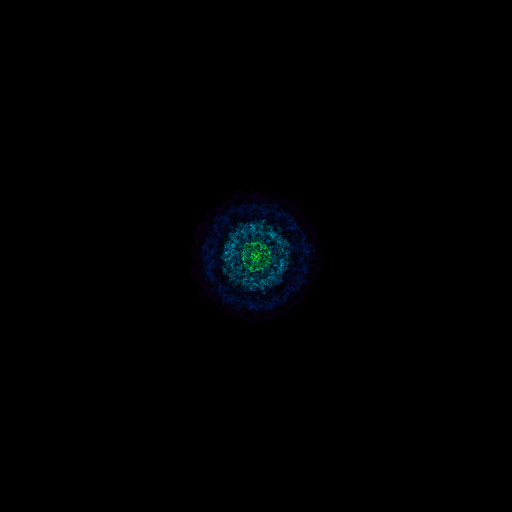

In [19]:
sc.show()

Let's change the transfer function a little bit.

In [20]:
sc = yt.create_scene(ds,'density')
source = sc[0]

In [21]:
source.transfer_function = yt.ColorTransferFunction(np.log10((1e-30,1e-23)),grey_opacity=True)
def linramp(vals, minval, maxval):
    return (vals - vals.min())/(vals.max() - vals.min())
source.transfer_function.map_to_colormap(
    np.log10(1e-25), np.log10(8e-24), colormap='arbre', scale_func=linramp)

In [22]:
source.set_use_ghost_zones(True)

cam = sc.camera

cam.width = 15*yt.units.kpc
cam.focus = ds.domain_center
cam.normal_vector = [-0.3, -0.3, 1]
cam.switch_orientation()

yt : [INFO     ] 2016-10-18 23:44:00,503 Rendering scene (Can take a while).
yt : [INFO     ] 2016-10-18 23:44:00,505 Creating volume


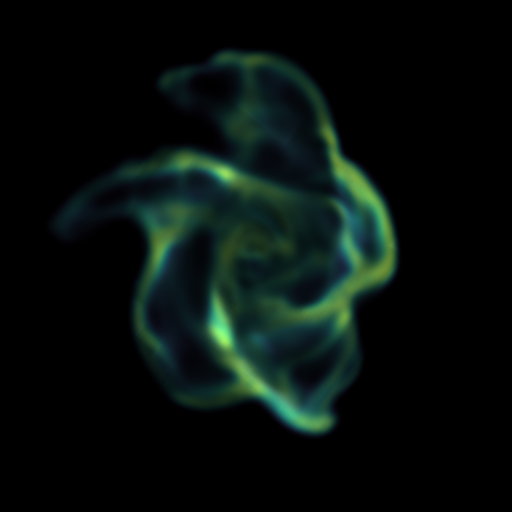

In [23]:
sc.show()